In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class_df = pd.read_csv('results/image_classifications_inception.tsv',
                       sep='\t')
class_df.head()

,image_id,label_1,confidence_1,label_2,confidence_2,label_3,confidence_3,prediction_time
0,NMAAHC-HCA_11_43_B,Loafer,0.660266,suit,0.150124,television,0.048822,4.930713
1,NMAAHC-HCA_1_19_C,suit,0.565756,Windsor_tie,0.026510,military_uniform,0.020577,0.174819
2,NMAAHC-HCA_9_10_C,bow_tie,0.991446,ice_lolly,0.001182,harmonica,0.001013,0.163646
3,NMAAHC-HCA_8_37_C_1,bolo_tie,0.156410,marimba,0.115157,television,0.058156,0.163590
4,NMAAHC-HCA_20_15_B_2,notebook,0.198700,laptop,0.150473,crossword_puzzle,0.084267,0.168260


In [29]:
class_df['label_1'].nunique()

264

In [6]:
class_df['confidence_1'].describe()

count    4842.000000
mean        0.401067
std         0.263683
min         0.027096
25%         0.180009
50%         0.334296
75%         0.585411
max         0.999879
Name: confidence_1, dtype: float64

In [11]:
label_stats = class_df.groupby('label_1').agg(label_count=('label_1','size'),
                                               median=('confidence_1','median')).reset_index()
#label_counts.columns = ['label_1','label_count']
label_stats = label_stats.sort_values('label_count', ascending=False)
label_stats.head(5)

,label_1,label_count,median
231,television,848,0.320037
48,bow_tie,490,0.543322
222,suit,430,0.567894
107,groom,312,0.418041
128,lab_coat,225,0.423205


In [16]:
labels_merged = label_stats.merge(class_df, on='label_1')
labels_merged.head()

,label_1,label_count,median,image_id,confidence_1,label_2,confidence_2,label_3,confidence_3,prediction_time
0,television,848,0.320037,NMAAHC-HCA_16_37_D,0.580014,monitor,0.041479,groom,0.029617,0.184780
1,television,848,0.320037,NMAAHC-HCA_17_36_C,0.338270,stretcher,0.055752,four-poster,0.038209,0.305631
2,television,848,0.320037,NMAAHC-HCA_17_50_C,0.620893,screen,0.089840,monitor,0.072530,0.179388
3,television,848,0.320037,NMAAHC-HCA_16_42_C_2,0.182952,stethoscope,0.077779,military_uniform,0.070049,0.190411
4,television,848,0.320037,NMAAHC-HCA_6_46_A,0.136860,home_theater,0.110737,shoji,0.107100,0.262740


In [19]:
top_labels = labels_merged[['image_id','label_1','label_count','confidence_1']].\
              sort_values(['label_count','confidence_1'], 
                          ascending=[False,False]).\
              drop_duplicates(subset=['label_1'], keep='first')
top_labels.head()

,image_id,label_1,label_count,confidence_1
503,NMAAHC-HCA_14_31_B,television,848,0.976213
915,NMAAHC-HCA_9_10_A,bow_tie,490,0.999879
1707,NMAAHC-HCA_21_40_C,suit,430,0.965192
1904,NMAAHC-HCA_21_24_A,groom,312,0.972028
2289,NMAAHC-HCA_21_64_C,lab_coat,225,0.998264


In [20]:
top_label_dict = top_labels.to_dict(orient='records')
top_label_dict[:3]

[{'image_id': 'NMAAHC-HCA_14_31_B',
  'label_1': 'television',
  'label_count': 848,
  'confidence_1': 0.9762130975723268},
 {'image_id': 'NMAAHC-HCA_9_10_A',
  'label_1': 'bow_tie',
  'label_count': 490,
  'confidence_1': 0.9998794794082642},
 {'image_id': 'NMAAHC-HCA_21_40_C',
  'label_1': 'suit',
  'label_count': 430,
  'confidence_1': 0.9651915431022644}]

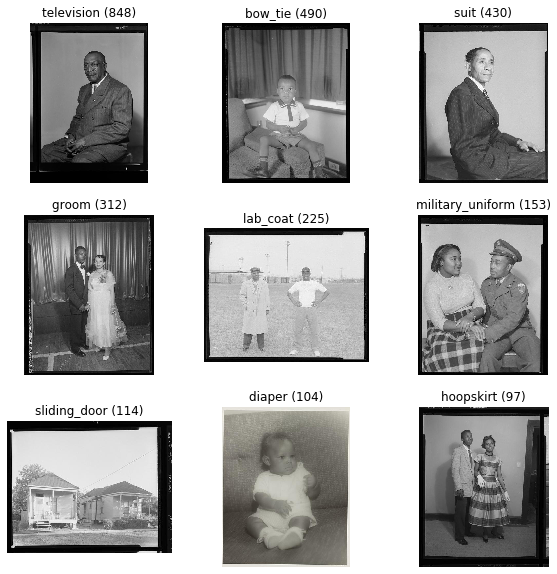

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    image_path = 'data/images/{}.jpg'.format(top_label_dict[i]['image_id'])
    image = plt.imread(image_path)
    axi.imshow(image)
    title = '{} ({})'.format(top_label_dict[i]['label_1'],
                             str(top_label_dict[i]['label_count']))
    axi.set_title(title)
    axi.grid(False)
    axi.axis('off')

plt.show()

In [24]:
labels_merged['med_dist'] = (labels_merged['median'] - labels_merged['confidence_1']).abs()
labels_merged.head()

,label_1,label_count,median,image_id,confidence_1,label_2,confidence_2,label_3,confidence_3,prediction_time,med_dist
0,television,848,0.320037,NMAAHC-HCA_16_37_D,0.580014,monitor,0.041479,groom,0.029617,0.184780,0.259977
1,television,848,0.320037,NMAAHC-HCA_17_36_C,0.338270,stretcher,0.055752,four-poster,0.038209,0.305631,0.018233
2,television,848,0.320037,NMAAHC-HCA_17_50_C,0.620893,screen,0.089840,monitor,0.072530,0.179388,0.300857
3,television,848,0.320037,NMAAHC-HCA_16_42_C_2,0.182952,stethoscope,0.077779,military_uniform,0.070049,0.190411,0.137085
4,television,848,0.320037,NMAAHC-HCA_6_46_A,0.136860,home_theater,0.110737,shoji,0.107100,0.262740,0.183177


In [28]:
med_labels = labels_merged[['image_id','label_1','label_count','median','med_dist']].\
              sort_values(['label_count','med_dist'], 
                          ascending=[False,True]).\
              drop_duplicates(subset=['label_1'], keep='first')
med_labels.head(9)

,image_id,label_1,label_count,median,med_dist
367,NMAAHC-HCA_3_27_B,television,848,0.320037,0.000041
1060,NMAAHC-HCA_8_32_B,bow_tie,490,0.543322,0.002380
1455,NMAAHC-HCA_3_34_A_2,suit,430,0.567894,0.000574
1977,NMAAHC-HCA_12_21_D,groom,312,0.418041,0.000050
2197,NMAAHC-HCA_9_44_A,lab_coat,225,0.423205,0.000000
2433,NMAAHC-HCA_15_38_D,military_uniform,153,0.431726,0.000000
2489,NMAAHC-HCA_17_26_B,sliding_door,114,0.215588,0.002992
2640,NMAAHC-HCA_9_11_B,diaper,104,0.377352,0.002799
2728,NMAAHC-HCA_1_7_A,hoopskirt,97,0.393092,0.000000


In [26]:
med_label_dict = med_labels.to_dict(orient='records')
med_label_dict[:3]

[{'image_id': 'NMAAHC-HCA_3_27_B',
  'label_1': 'television',
  'label_count': 848,
  'median': 0.32003650069236755,
  'med_dist': 4.1216611862127106e-05},
 {'image_id': 'NMAAHC-HCA_8_32_B',
  'label_1': 'bow_tie',
  'label_count': 490,
  'median': 0.5433217883110046,
  'med_dist': 0.0023804306983947754},
 {'image_id': 'NMAAHC-HCA_3_34_A_2',
  'label_1': 'suit',
  'label_count': 430,
  'median': 0.5678944289684296,
  'med_dist': 0.0005738437175750732}]

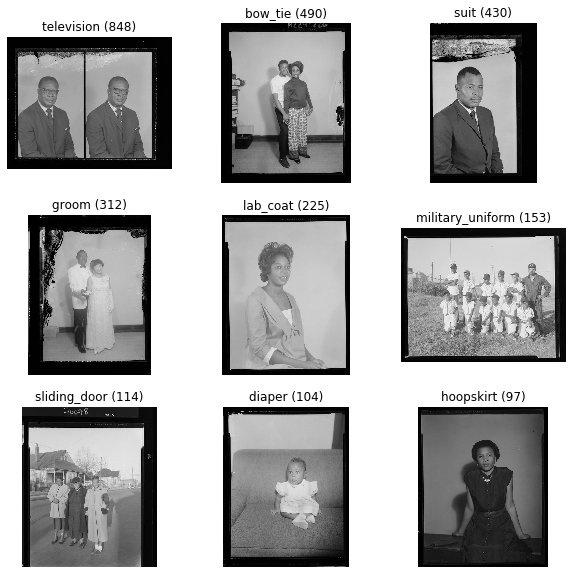

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    image_path = 'data/images/{}.jpg'.format(med_label_dict[i]['image_id'])
    image = plt.imread(image_path)
    axi.imshow(image)
    title = '{} ({})'.format(med_label_dict[i]['label_1'],
                             str(med_label_dict[i]['label_count']))
    axi.set_title(title)
    axi.grid(False)
    axi.axis('off')

plt.show()